<a href="https://colab.research.google.com/github/DavesCP/Machile-Learning-Preven-o-a-fraude/blob/main/Machine_learning_Identifica%C3%A7%C3%A3o_de_fraude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
#Imports
import numpy as np 
import itertools
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import tree
from six import StringIO
import pydotplus
from IPython.display import Image 

In [5]:
#Atribuindo os dados para o dataframe
fraude_df = pd.read_csv('Fraud_Data.csv', header=0)

In [7]:
#Entendendo o dataset
print(fraude_df.head(5))
count_row = fraude_df.shape[0]  #Numero de registros
count_col = fraude_df.shape[1]  #numero de colunas
print(count_row)
print(count_col)

       id             cadastro  ...            ip  fraude
0   22058  2015-02-24 22:55:49  ...  7.327584e+08       0
1  333320  2015-06-07 20:39:50  ...  3.503114e+08       0
2    1359  2015-01-01 18:52:44  ...  2.621474e+09       1
3  150084  2015-04-28 21:13:25  ...  3.840542e+09       0
4  221365  2015-07-21 07:09:52  ...  4.155831e+08       0

[5 rows x 11 columns]
151112
11


In [9]:
#Remover registros que tenham algum campo em branco para evitar ruídos no modelo
df = fraude_df.dropna()
print(fraude_df.head(5))

       id             cadastro  ...            ip  fraude
0   22058  2015-02-24 22:55:49  ...  7.327584e+08       0
1  333320  2015-06-07 20:39:50  ...  3.503114e+08       0
2    1359  2015-01-01 18:52:44  ...  2.621474e+09       1
3  150084  2015-04-28 21:13:25  ...  3.840542e+09       0
4  221365  2015-07-21 07:09:52  ...  4.155831e+08       0

[5 rows x 11 columns]


In [10]:
print('Quantidade de campos(colunas): ', fraude_df.shape[1])
print('Total de registros:', fraude_df.shape[0])

Quantidade de campos(colunas):  11
Total de registros: 151112


In [11]:
#Definindo o label
Y = fraude_df['fraude'].values 
print(Y)

[0 0 1 ... 0 0 0]


In [12]:
print(fraude_df.describe())

                  id          valor          idade            ip         fraude
count  151112.000000  151112.000000  151112.000000  1.511120e+05  151112.000000
mean   200171.040970      36.935372      33.140704  2.152145e+09       0.093646
std    115369.285024      18.322762       8.617733  1.248497e+09       0.291336
min         2.000000       9.000000      18.000000  5.209350e+04       0.000000
25%    100642.500000      22.000000      27.000000  1.085934e+09       0.000000
50%    199958.000000      35.000000      33.000000  2.154770e+09       0.000000
75%    300054.000000      49.000000      39.000000  3.243258e+09       0.000000
max    400000.000000     154.000000      76.000000  4.294850e+09       1.000000


In [13]:
#Atribuição das features
X = fraude_df[['valor', 'idade']].values
print(X)

[[3.40000000e+01 3.90000000e+01 7.32758369e+08]
 [1.60000000e+01 5.30000000e+01 3.50311388e+08]
 [1.50000000e+01 5.30000000e+01 2.62147382e+09]
 ...
 [4.00000000e+01 2.60000000e+01 2.74847052e+09]
 [4.60000000e+01 3.70000000e+01 3.60117471e+09]
 [2.00000000e+01 3.80000000e+01 4.10382451e+09]]


In [14]:
#Dividindo dataset de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.2, random_state=3)

'Agora vamos criar o e treinar o nosso modelo. Lembram da diferença entre algortimo e modelo? Existe o algortimo de treinamento (que neste caso é o de árvore de decisão) que irá exportar um modelo treinado (que também é um algoritmo).'

In [15]:
#Criando algoritmo de árvore de decisão
algortimo_arvore = DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [16]:
#Treinar modelo com os datasets de treino
modelo = algortimo_arvore.fit(X_treino, Y_treino)

In [17]:
#Mostrando as features mais importantes
print (modelo.feature_importances_)

[0.21346373 0.24788011 0.53865617]


In [30]:
#Entendendo as features mais importantes
importances = modelo.feature_importances_
indices = np.argsort(importances)[::-1]
print("Ranking das features:", indices)

Feature ranking: [2 1 0]


1. feature 2 (0.538656)
2. feature 1 (0.247880)
3. feature 0 (0.213464)


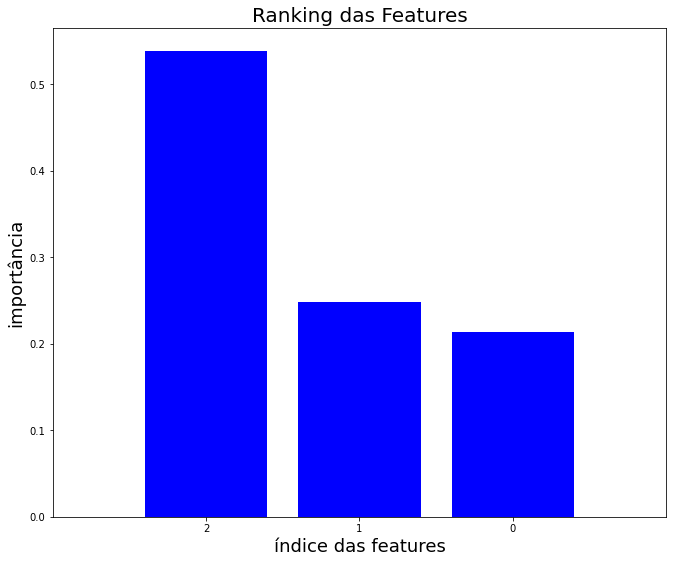

In [36]:
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
f, ax = plt.subplots(figsize=(11, 9))
plt.title("Ranking das Features", fontsize = 20)
plt.bar(range(X.shape[1]), importances[indices],
    color="b", 
    align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.ylabel("importância", fontsize = 18)
plt.xlabel("índice das features", fontsize = 18)
plt.show()

In [32]:
#Aplicando o modelo na base de testes e armazena o resultado 
Y_predicoes = modelo.predict(X_teste)

In [34]:
#Avaliação do modelo
print("ACURÁCIA DO MODELO: ", accuracy_score(Y_teste, Y_predicoes))
print (classification_report(Y_teste, Y_predicoes))

ACURÁCIA DO MODELO:  0.9049399463984382
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     27340
           1       0.73      0.01      0.01      2883

    accuracy                           0.90     30223
   macro avg       0.82      0.50      0.48     30223
weighted avg       0.89      0.90      0.86     30223



Matriz de Confusão sem normalizacão 
[[27334     6]
 [ 2867    16]]


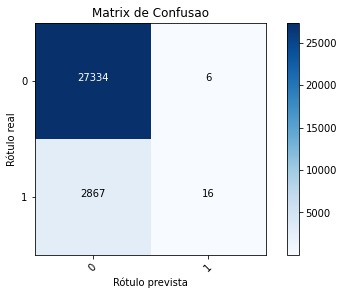

In [35]:
#Montar matriz de confusão
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de Confusão Normalizada")
    else:
        print('Matriz de Confusão sem normalizacão ')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Rótulo real')
    plt.xlabel('Rótulo prevista')

matrix_confusao = confusion_matrix(Y_teste, Y_predicoes)
plt.figure()
plot_confusion_matrix(matrix_confusao, classes=nome_classes,
                      title='Matrix de Confusao')